Parámetros del ajuste gaussiano:
A = 6110735.3505, mu = 0.0000, sigma = 6.5287e-08 ± 5.0789e-11
Rigidez de la trampa (k) calculada con análisis del potencial: 9.7130e-07 ± 1.5112e-09
Rigidez de la trampa (k) real: 1.0000e-06


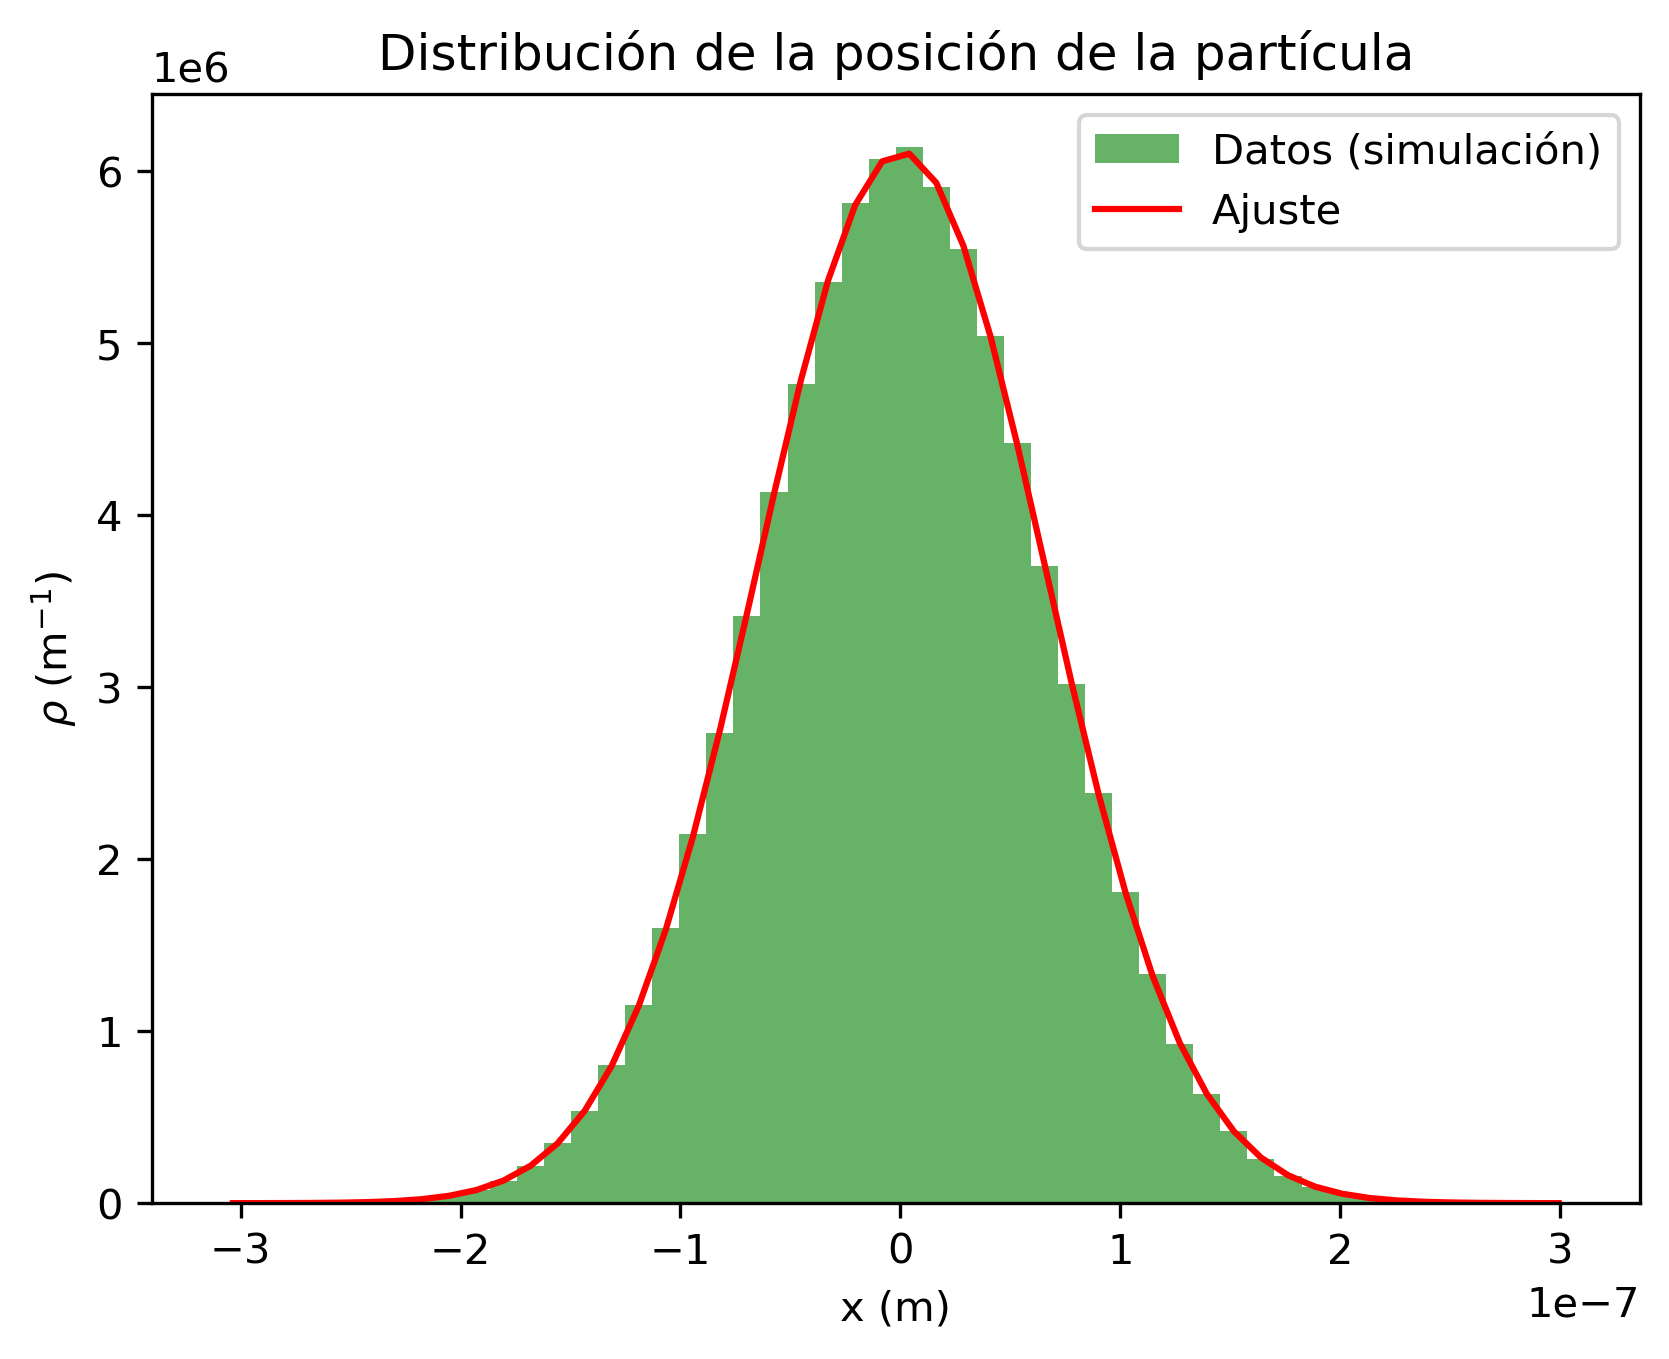

In [16]:
#Import all the necessary libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# Parámetros del sistema
r = 0.000001
eta = 0.001
k = 1.0 * 10**(-6)
kB = 1.38 * 10**(-23)
T = 300
gamma = 6*np.pi*r*eta
dt = 0.001
total_time = 2.0
N = int(total_time / dt)
M = 850

# Función para simular una trayectoria
def simular_trayectoria(k, gamma, kB, T, dt, N):
    x = np.zeros(N)
    for i in range(1, N): 
        
        x[i] = x[i-1]-(k / gamma) * x[i-1] * dt + np.sqrt((2 * kB*T *dt) /(gamma)) * np.random.normal(0,1)
    return x
    
# Simular M trayectorias
trayectorias = np.zeros((M, N))
for j in range(M):
    trayectorias[j] = simular_trayectoria(k, gamma, kB, T, dt, N)

# Combinar todas las trayectorias en un solo conjunto de datos
x_total = trayectorias.flatten()

# Histograma de la distribución de x
counts, bin_edges = np.histogram(x_total, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Incertidumbres en los valores del histograma (Suponiendo Poisson)
sigma_counts = np.sqrt(counts)

# Función gaussiana para ajustar la distribución de x
def gaussiana(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Ajustar una gaussiana a la distribución de x usando mínimos cuadrados
param_opt, param_cov = curve_fit(gaussiana, bin_centers, counts, p0=[6200259.911, 0.0, 0.000000064])

# Parámetros óptimos
A_opt, mu_opt, sigma_opt = param_opt

# Calcular la rigidez k usando el análisis del potencial
k_potencial = kB * T / (sigma_opt**2)

# Calcular el error estándar de sigma (último parámetro)
error_sigma = np.sqrt(param_cov[2, 2])

# Calcular el error estándar de k usando propagación de errores
error_k = 2 * (kB * T / (sigma_opt**3)) * error_sigma

# Mostrar resultados
print(f"Parámetros del ajuste gaussiano:")
print(f"A = {A_opt:.4f}, mu = {mu_opt:.4f}, sigma = {sigma_opt:.4e} ± {error_sigma:.4e}")
print(f"Rigidez de la trampa (k) calculada con análisis del potencial: {k_potencial:.4e} ± {error_k:.4e}")
print(f"Rigidez de la trampa (k) real: {k:.4e}")

# Graficar la distribución de x y el ajuste gaussiano
plt.figure(dpi=300)
plt.hist(x_total, bins=50, density=True, alpha=0.6, color='green', label="Datos (simulación)")
plt.plot(bin_centers, gaussiana(bin_centers, A_opt, mu_opt, sigma_opt), color='red', label="Ajuste")
plt.xlabel(r'x (m)')
plt.ylabel(r'$\rho$ (m$^{-1}$)')
plt.title("Distribución de la posición de la partícula")
plt.legend()
#plt.grid()
plt.show()